This project is about implement Linear Regression model to predict house prices based on square footage, numbers of bedrooms and Bathrooms.



In [1]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import joblib


Step 2: Load The Dataset
We have manually Downlaoded the dataset from kaggle : Url -> www.kaggle.com/house-prices-advanced-regression-techniques/data


In [ ]:
#Load DataSet
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Step 3: Data Cleaning

#Check for missing values
print(df.isnull().sum())

#Drop rows with missing target variable(Price)
df.dropna(subset=['SalePrice'], inplace=True)

#Handle categorical columns (Covert them to numerical)
df = pd.get_dummies(df, drop_first=True)

df.fillna(df.mean(), inplace=True)
print(df.describe())


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    22.024023    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    70.049958    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea 

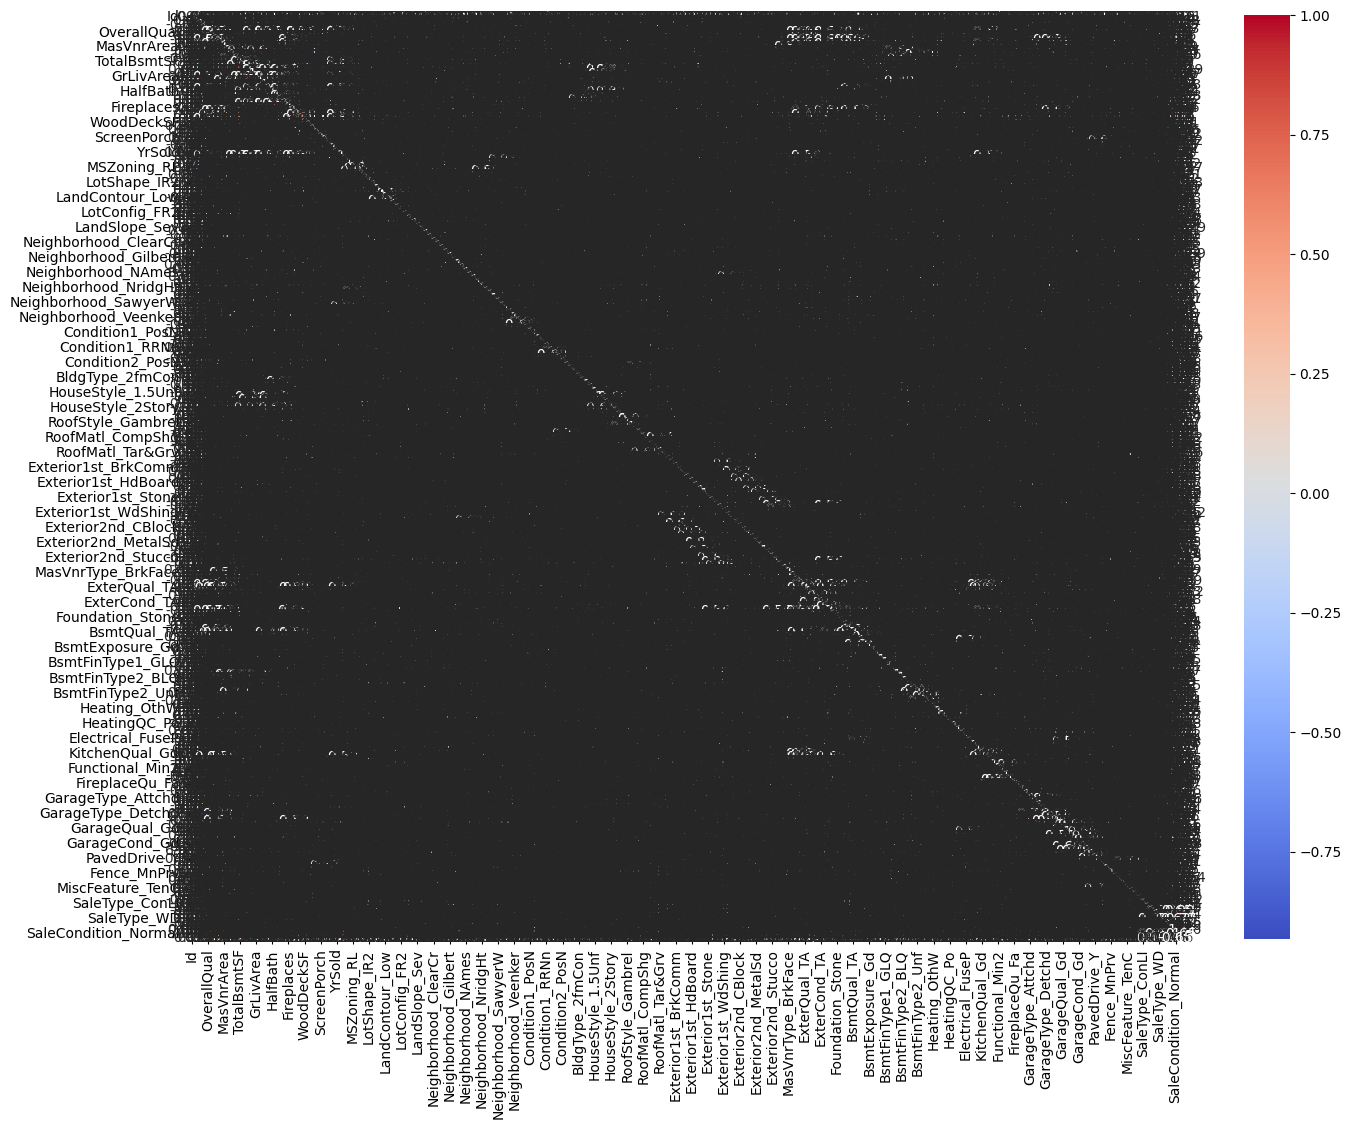

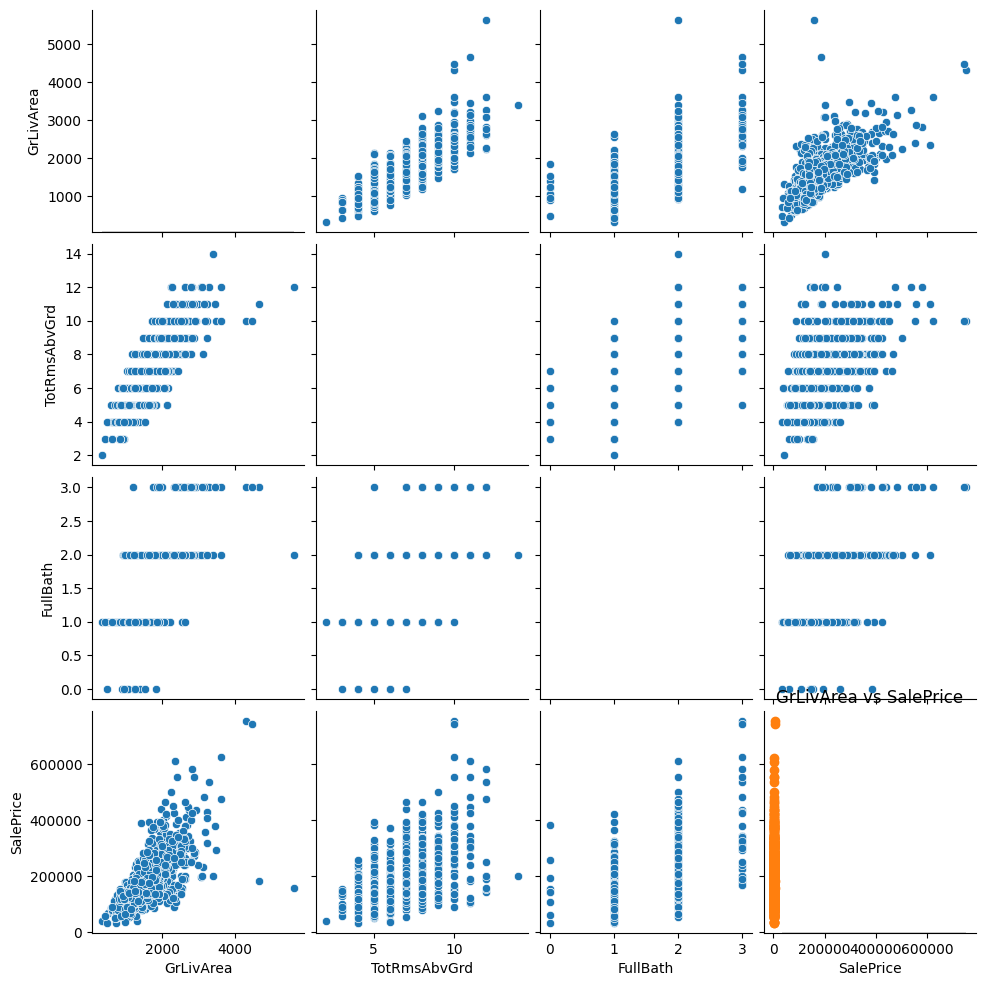

In [ ]:
#Exploratory Data Analysis (EDA) : It helps to understand data visually and statistically to plot relationship between features and target value.

#Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#Scattere plot of the key features vs SalesPrice
sns.pairplot(df[['GrLivArea','TotRmsAbvGrd','FullBath','SalePrice']])

#Scatter plot between GrLivArea and SalePrice
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


In [ ]:
#Step 5 : Features Selection

features = ['GrLivArea','TotRmsAbvGrd','FullBath']
x = df[features]
y = df['SalePrice']


In [ ]:
#Step 5: Split Data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
#Features Scalping (Optional for Linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
#Model Evaluation
y_pred = model.predict(X_test_scaled)

#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3234537183.9084816
Root Mean Squared Error: 56872.99169121035
R-squared: 0.5783051337663179


In [ ]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

#Best parameters found by GridSearchCV
print(f'Best Alpha: {grid_search.best_params_}')


Best Alpha: {'alpha': 10}


In [ ]:
#Save the model

#Save the Trained Model
joblib.dump(model, 'house_price_prediction.pkl')

#Save the Scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
#Load the Model and Make Prediction

loaded_model = joblib.load('house_price_prediction.pkl')
loaded_scaler =joblib.load('scaler.pkl')

#Predict on New Data
new_data = pd.DataFrame({'GrLivArea': [1500], 'TotRmsAbvGrd': [4], 'FullBath': [2]})
new_data_scaled = loaded_scaler.transform(new_data)
predicted_price = loaded_model.predict(new_data_scaled)
print(f'Predicted House Price: {predicted_price[0]:,.2f}')

Predicted House Price: 213,183.14
